In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
%matplotlib notebook

In [118]:
df = pd.read_pickle("example_cleaned.pkl")
df = df[['Result','zipcode', 'distance', 'NewSection']]
# rename columns
df.columns = ['result', 'zipcode', 'distance', 'entrance']

In [119]:
df.entrance.unique()

array(['Bad', 'Lene', 'West', 'Stadion', 'outside'], dtype=object)

In [120]:
group1 = df.loc[df.distance == 1]
group2 = df.loc[df.distance == 2]
group7 = df.loc[df.distance == 7]
group20 = df.loc[df.distance == 20]

<IPython.core.display.Javascript object>


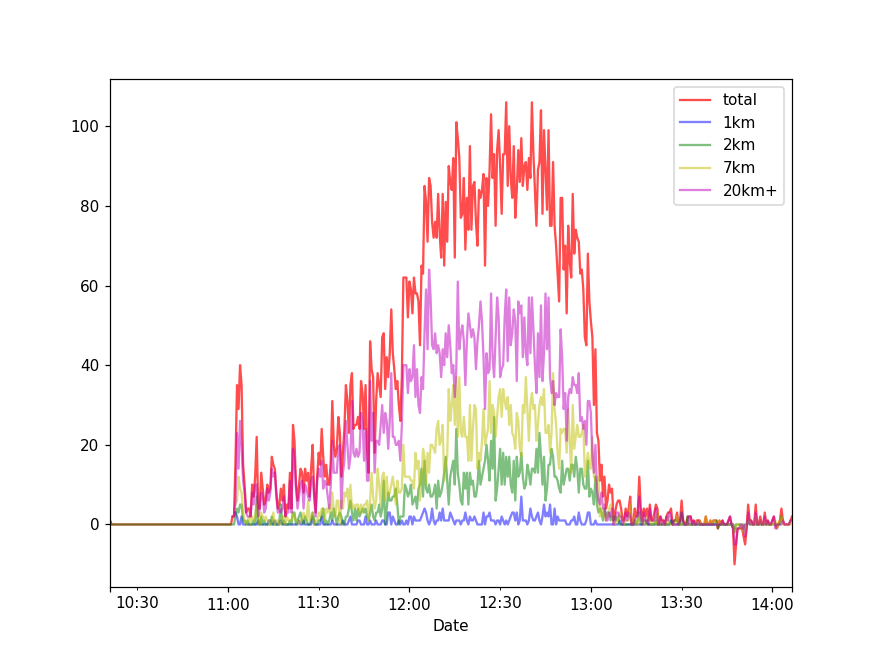

In [121]:
plt.figure(figsize = (8,6))
df.result.resample('30s').sum().plot(c='r', alpha = 0.7, label = 'total')
group1.result.resample('30s').sum().plot(c='b', alpha = 0.5, label = '1km')
group2.result.resample('30s').sum().plot(c='g', alpha = 0.5,label = '2km')
group7.result.resample('30s').sum().plot(c='y', alpha = 0.5, label = '7km')
group20.result.resample('30s').sum().plot(c='m', alpha = 0.5, label = '20km+')
plt.legend()

# alternate timestamps

In [123]:
import datetime

# Optimale Kurve

# Optimierung

In [147]:
def adjust_arrivaltime(data, adjustment):
    adjusted_data = data.copy().reset_index()
    
    adjusted_data.loc[adjusted_data.distance == 1, 'Date'] = adjusted_data.loc[adjusted_data.distance == 1, "Date"] - datetime.timedelta(minutes=adjustment[0])
    adjusted_data.loc[adjusted_data.distance == 2, 'Date'] = adjusted_data.loc[adjusted_data.distance == 2, "Date"] - datetime.timedelta(minutes=adjustment[1])
    adjusted_data.loc[adjusted_data.distance == 7, 'Date'] = adjusted_data.loc[adjusted_data.distance == 7, "Date"] - datetime.timedelta(minutes=adjustment[7])
    adjusted_data.loc[adjusted_data.distance == 20, 'Date'] = adjusted_data.loc[adjusted_data.distance == 20, "Date"] - datetime.timedelta(minutes=adjustment[20])
    adjusted_data.set_index("Date", drop = True, inplace = True)
    return adjusted_data

In [168]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [157]:
updated_data = adjust_arrivaltime(df, 20, 60)
updated_data

,result,zipcode,distance,entrance
Date,,,,
2019-10-05 10:21:24,1,01217,2.0,Bad
2019-10-05 10:01:31,1,06667,20.0,Lene
2019-10-05 10:01:34,1,09224,20.0,Lene
2019-10-05 10:02:25,1,01558,20.0,Bad
2019-10-05 10:02:29,1,01877,20.0,Bad
...,...,...,...,...
2019-10-05 14:03:21,1,01237,7.0,Bad
2019-10-05 13:03:41,1,03238,20.0,Lene
2019-10-05 13:06:28,1,60435,20.0,Lene


In [ ]:
rmse(updated_data, )

In [158]:
rule1 = df.copy().reset_index()
# all 20km+ come earlier
rule1.loc[rule1.distance == 20, 'Date'] = rule1.loc[rule1.distance == 20, "Date"] - datetime.timedelta(minutes=30)
rule1.loc[rule1.distance == 7, 'Date'] = rule1.loc[rule1.distance == 7, "Date"] - datetime.timedelta(minutes=15)
rule1.set_index("Date", drop = True, inplace = True)

In [145]:
rule1

,result,zipcode,distance,entrance
Date,,,,
2019-10-05 10:21:24,1,01217,2.0,Bad
2019-10-05 10:31:31,1,06667,20.0,Lene
2019-10-05 10:31:34,1,09224,20.0,Lene
2019-10-05 10:32:25,1,01558,20.0,Bad
2019-10-05 10:32:29,1,01877,20.0,Bad
...,...,...,...,...
2019-10-05 13:48:21,1,01237,7.0,Bad
2019-10-05 13:33:41,1,03238,20.0,Lene
2019-10-05 13:36:28,1,60435,20.0,Lene


rule1 = df.loc[df.distance == 20]
rule1.index = rule1.index - datetime.timedelta(hours = 2)

<IPython.core.display.Javascript object>


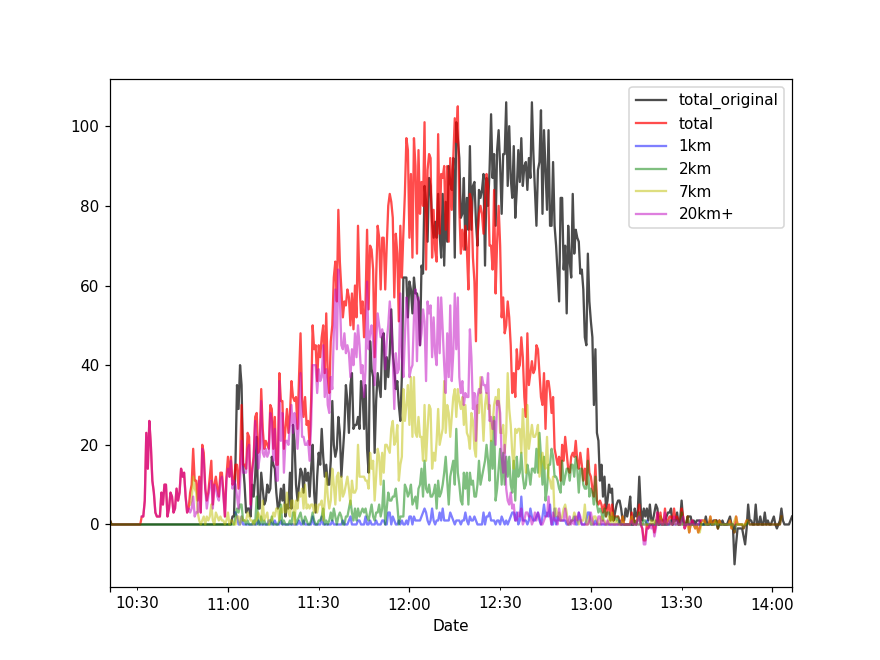

In [146]:
df_plot = rule1

group1 = df_plot.loc[df_plot.distance == 1]
group2 = df_plot.loc[df_plot.distance == 2]
group7 = df_plot.loc[df_plot.distance == 7]
group20 = df_plot.loc[df_plot.distance == 20]

plt.figure(figsize = (8,6))
df.result.resample('30s').sum().plot(c='k', alpha = 0.7, label = 'total_original', style="-")

df_plot.result.resample('30s').sum().plot(c='r', alpha = 0.7, label = 'total')
group1.result.resample('30s').sum().plot(c='b', alpha = 0.5, label = '1km')
group2.result.resample('30s').sum().plot(c='g', alpha = 0.5,label = '2km')
group7.result.resample('30s').sum().plot(c='y', alpha = 0.5, label = '7km')
group20.result.resample('30s').sum().plot(c='m', alpha = 0.5, label = '20km+')
plt.legend()